**Reading Dataset**

In [ ]:
#Data preparation/cleaning
```{r}

install.packages("dplyr")
library(dplyr)
install.packages("janitor")
library(janitor)
install.packages("ggcorrplot")

#Dataframe
fd_data <- read.csv("FD_Times.csv")


#Remove rows with missing values

#Empty vector to store the rows that contain blank values
vec_blnk <- c()

#Looping through rows
for (i in 1 : nrow(fd_data)) {
  #Counter for empty cells in each row
  cnt = 0

  #Looping through col
  for(j in 1 : ncol(fd_data)) {

    #Check if cell is empty
    if(isTRUE(fd_data[i,j] == "")) {
      cnt = cnt + 1

      #Append row number
      vec_blnk <- append(vec_blnk, i)

    }
  }

}

#Deleting rows using vector index
no_blnk_data <- fd_data[-vec_blnk, ]

#Deleting rows that contain cells with NA value
no_blnk_data <- na.omit(no_blnk_data)


#Remove duplicate rows if present
clean_data <- no_blnk_data %>% distinct()

#Remove unnecessary predictors: Order_ID
clean_data <- clean_data %>% select(-Order_ID)

#Remove suspicious observation: DT 141 min, row 117
clean_data <- clean_data[-c(117), ]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
#read data set
data = pd.read_csv('seattle-weather.csv')
#show first few lines of data
data.head()


FileNotFoundError: [Errno 2] No such file or directory: 'seattle-weather.csv'

**Data Cleaning**

In [ ]:
#check for missing values
missing_values = data.isnull().sum()

# print missing values for each column
print("Missing Values in Each Column:")
print(missing_values)
#there is no missing values

Missing Values in Each Column:
date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [ ]:
#transform weather into binary numbers for each type of precipitation
# encode the weather column
data_encoded = pd.get_dummies(data, columns=['weather'], prefix='weather')

data_encoded.head()

# replace False with 0 and True with 1
data_encoded = data_encoded.replace({False: 0, True: 1})

data_encoded.head()

<ipython-input-5-8644a52186b8>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded = data_encoded.replace({False: 0, True: 1})


,date,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,2012-01-01,0.0,12.8,5.0,4.7,1,0,0,0,0
1,2012-01-02,10.9,10.6,2.8,4.5,0,0,1,0,0
2,2012-01-03,0.8,11.7,7.2,2.3,0,0,1,0,0
3,2012-01-04,20.3,12.2,5.6,4.7,0,0,1,0,0
4,2012-01-05,1.3,8.9,2.8,6.1,0,0,1,0,0


**More EDA**

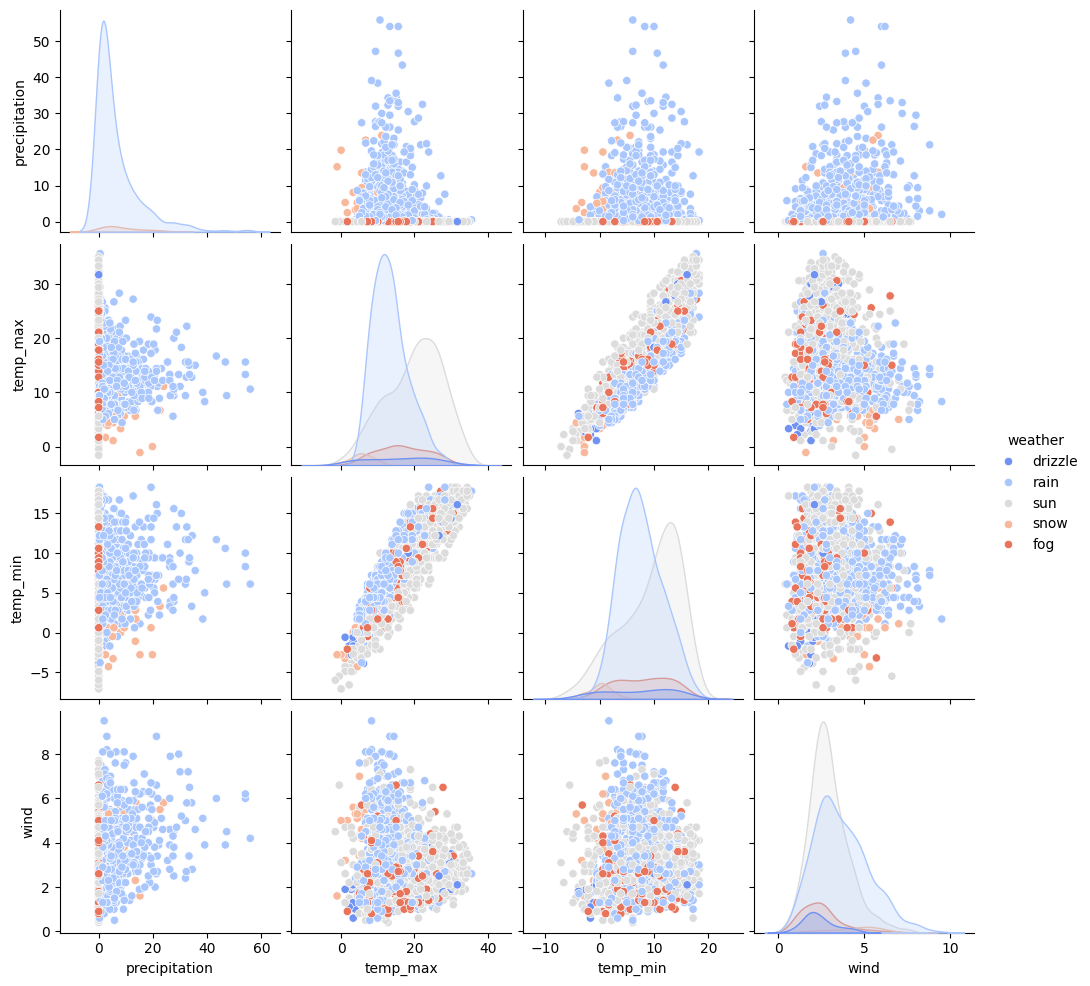

In [ ]:

sns.pairplot(data, hue='weather', palette='coolwarm')
plt.show()

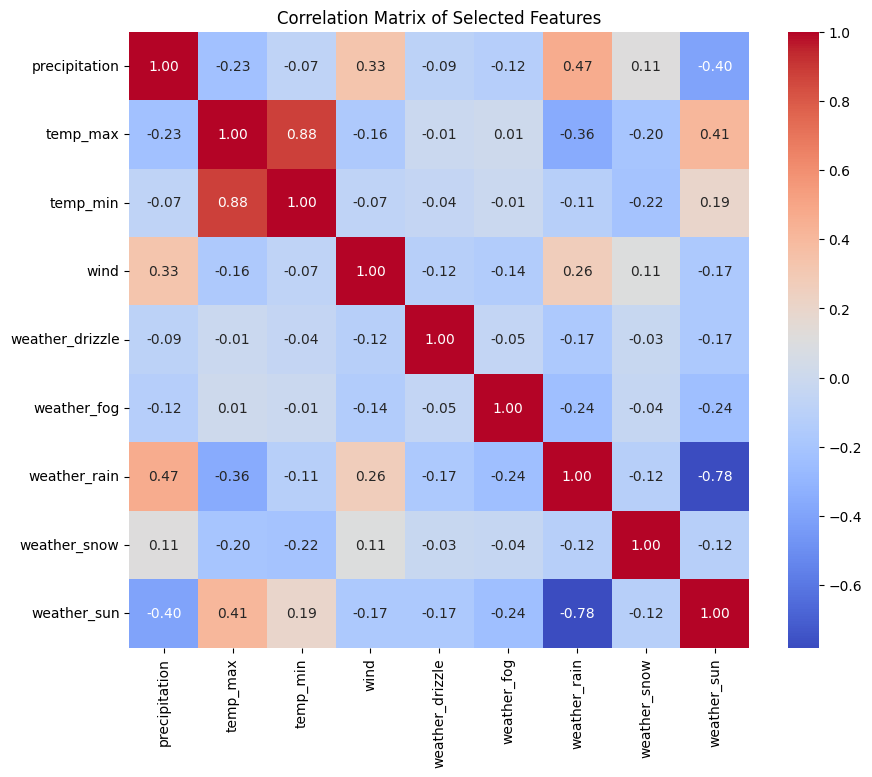

In [ ]:
selected_features = ['precipitation', 'temp_max', 'temp_min', 'wind', 'weather_drizzle', 'weather_fog', 'weather_rain', 'weather_snow', 'weather_sun']
select_data = data_encoded[selected_features]
# Compute the correlation matrix
correlation_matrix = select_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix of Selected Features')
plt.show()

<Figure size 1000x600 with 0 Axes>

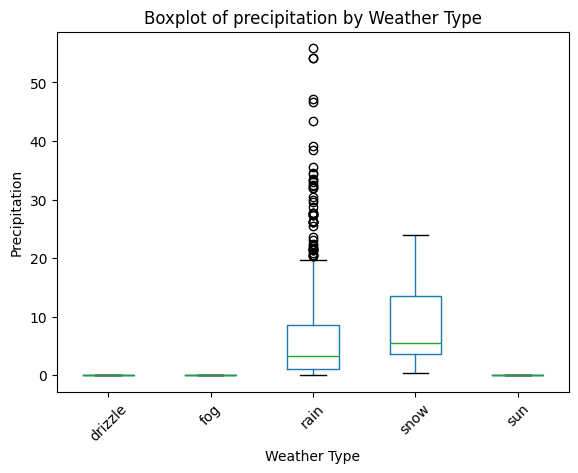

<Figure size 1000x600 with 0 Axes>

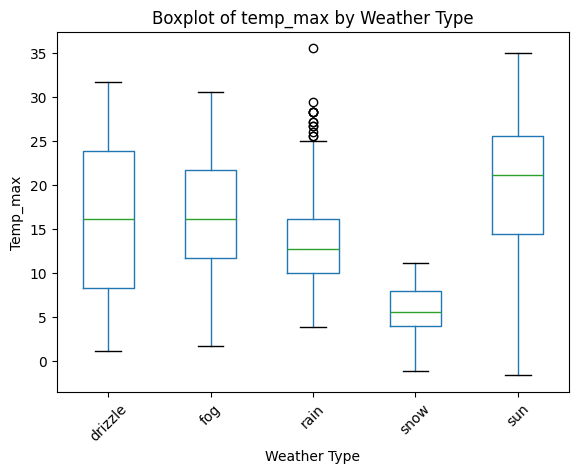

<Figure size 1000x600 with 0 Axes>

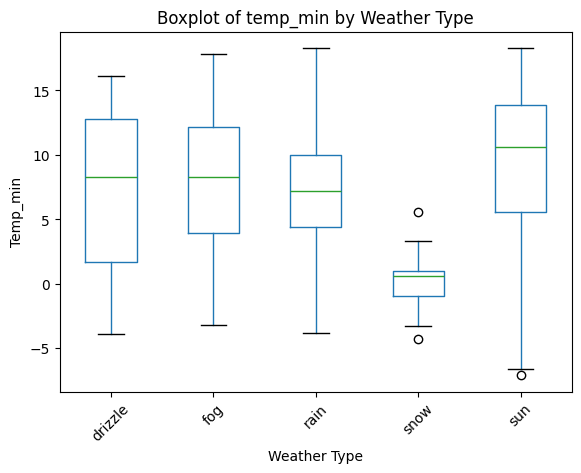

<Figure size 1000x600 with 0 Axes>

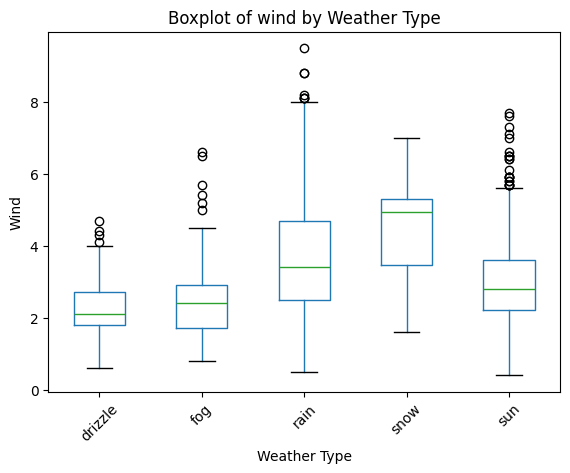

In [ ]:
# combine original weather column back with numeric data for boxplot visualization
data['weather'] = data_encoded.iloc[:, 5:].idxmax(axis=1).str.replace('weather_', '')

#  selected columns with numbers
numerical_columns = ['precipitation', 'temp_max', 'temp_min', 'wind']

#  boxplots for each numerical column grouped by weather type
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    data.boxplot(column=column, by='weather', grid=False)
    plt.title(f'Boxplot of {column} by Weather Type')
    plt.suptitle('')  # Remove default title
    plt.xlabel('Weather Type')
    plt.ylabel(column.capitalize())
    plt.xticks(rotation=45)
    plt.show()

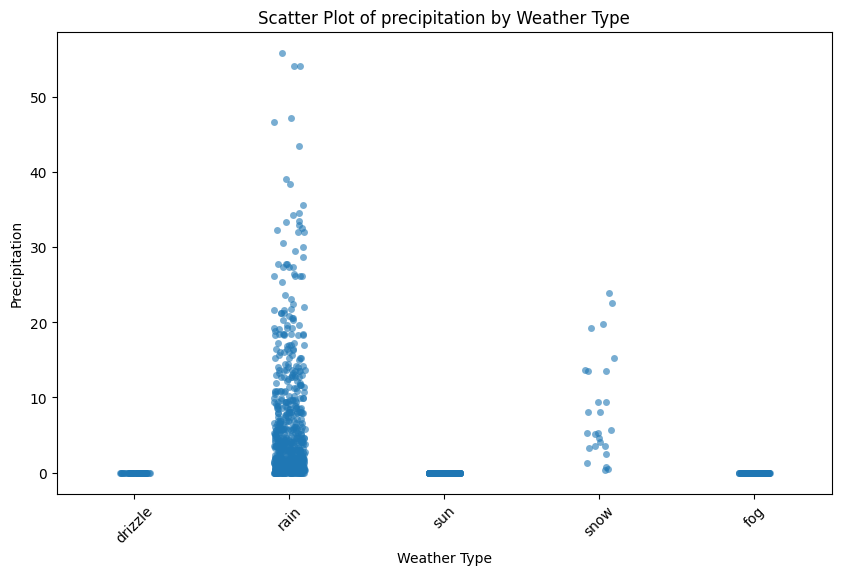

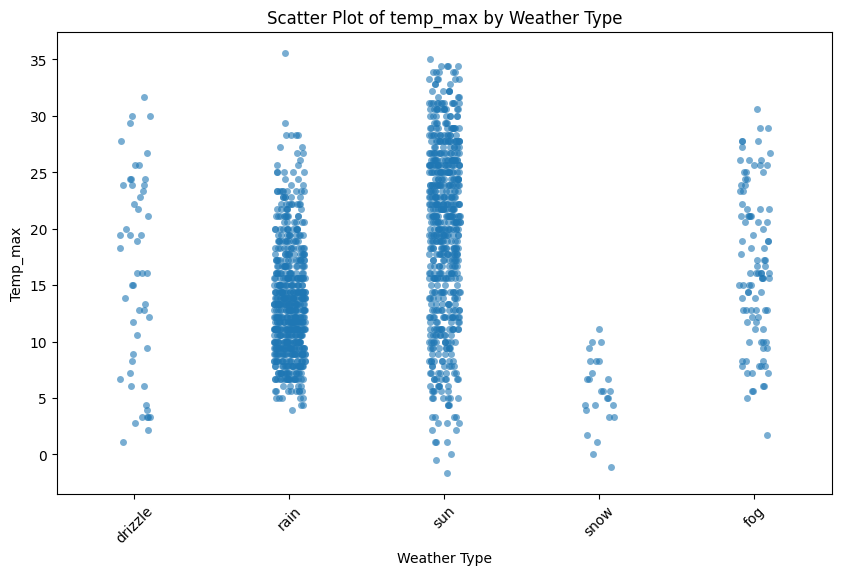

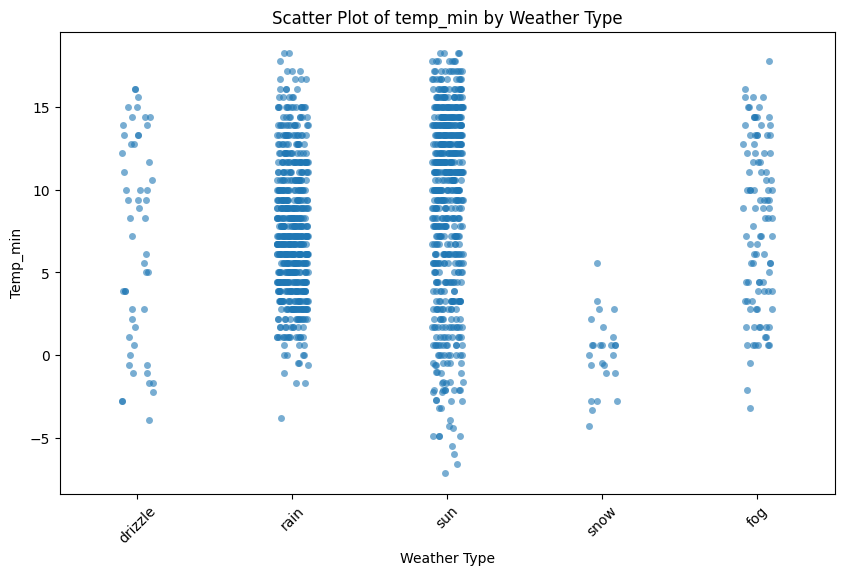

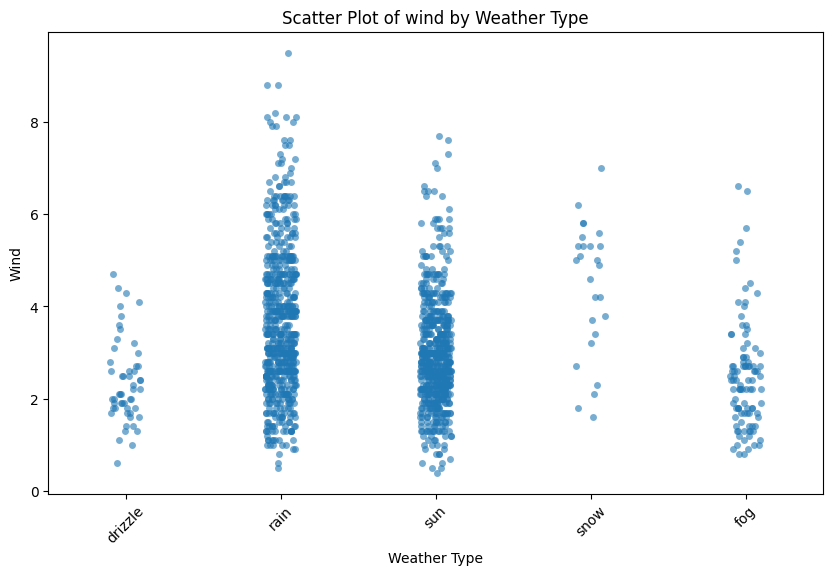

In [ ]:
# scatter plots for each numerical column grouped by weather type
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.stripplot(data=data, x='weather', y=column, jitter=True, alpha=0.6)
    plt.title(f'Scatter Plot of {column} by Weather Type')
    plt.xlabel('Weather Type')
    plt.ylabel(column.capitalize())
    plt.xticks(rotation=45)
    plt.show()

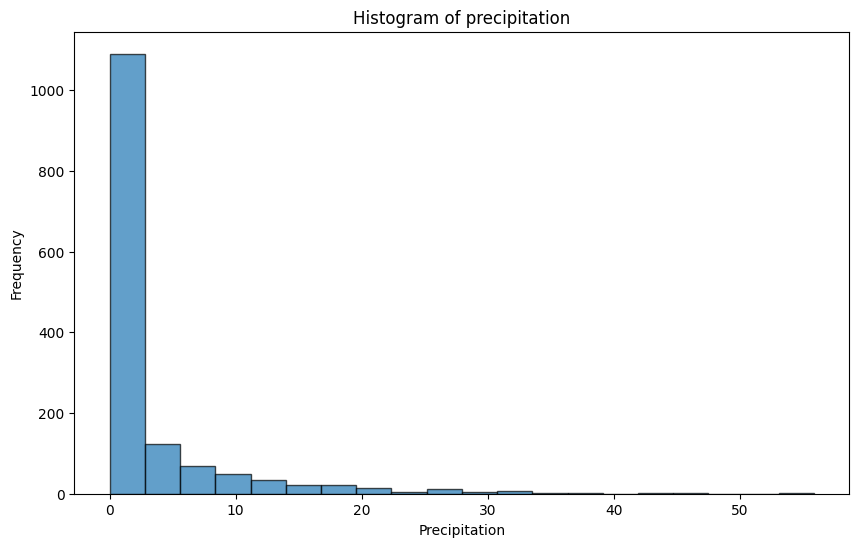

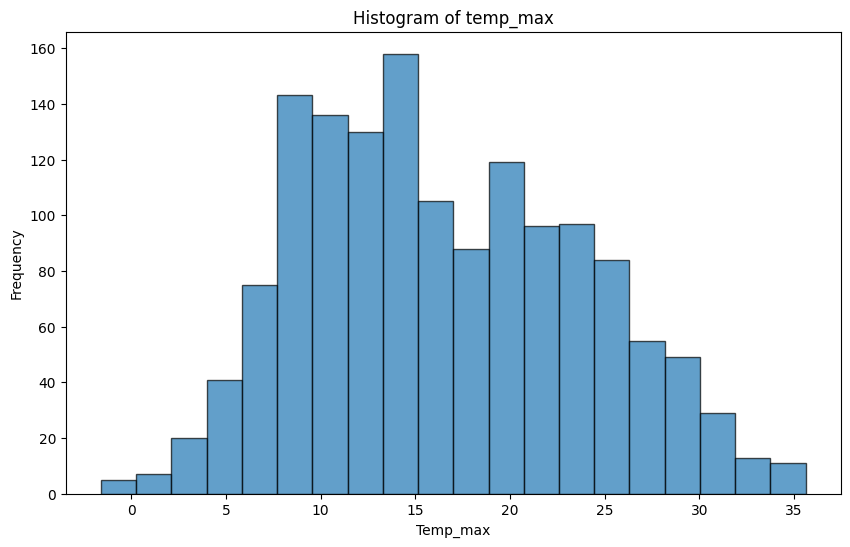

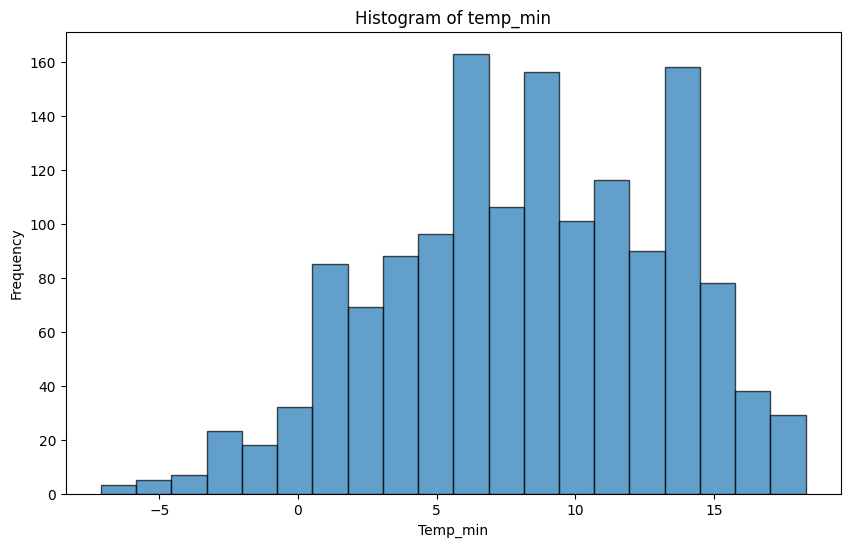

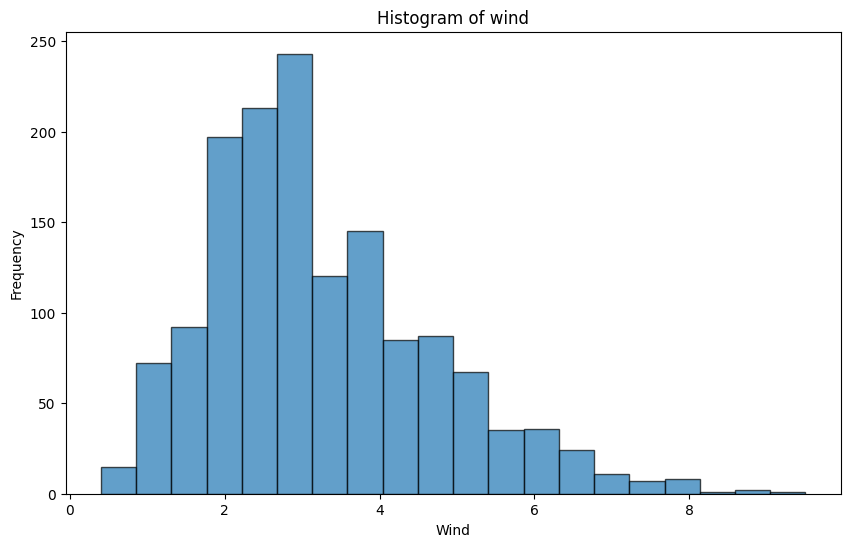

In [ ]:
#histograms on numerical variables
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    data[column].hist(bins=20, alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()


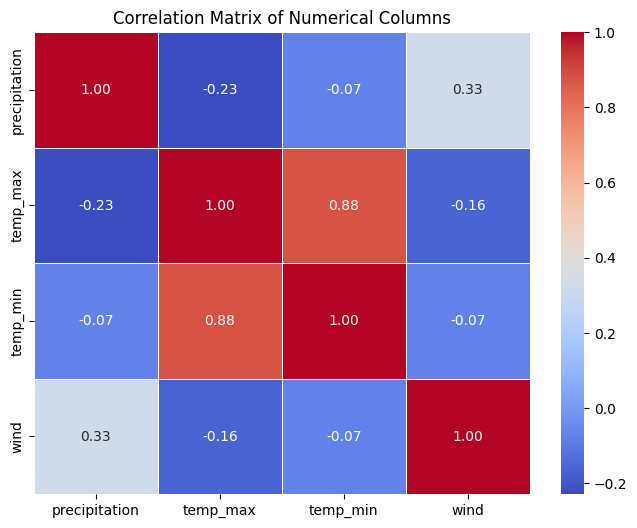

In [ ]:
# correlation matrix for numerical columns
correlation_matrix = data[numerical_columns].corr()

# plot the correlation matrix as a heatmap since there are multiple variables
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

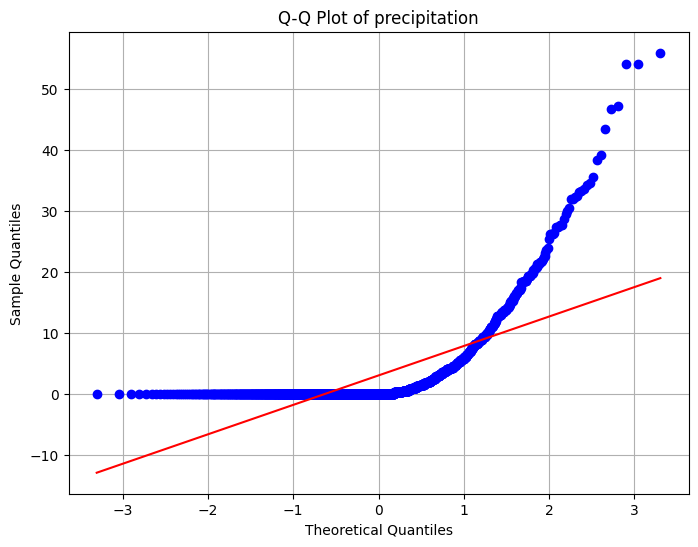

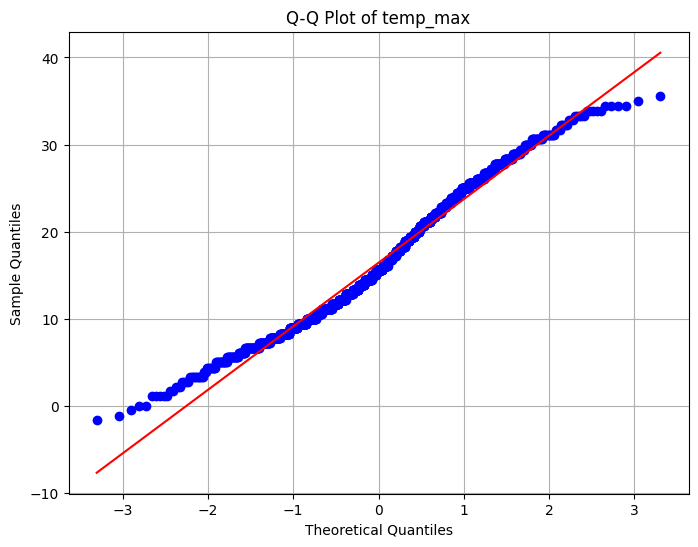

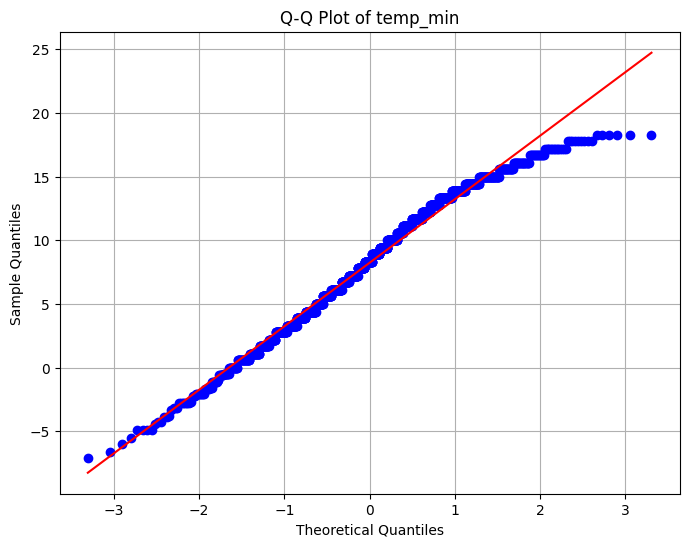

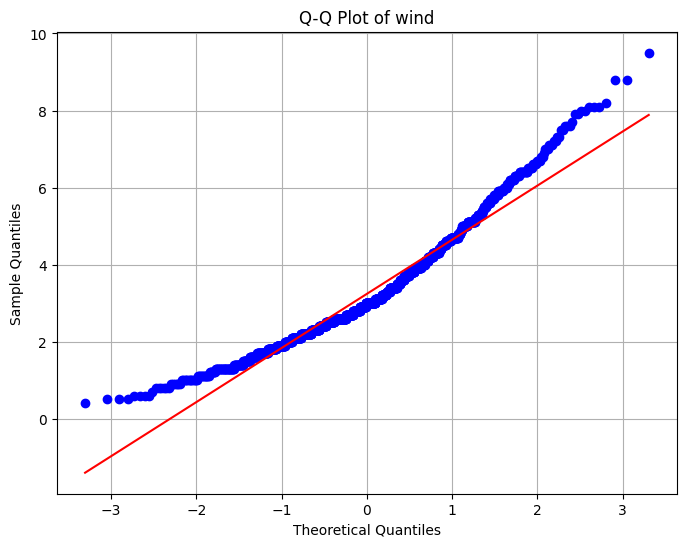

In [ ]:
import scipy.stats as stats

# Q-Q plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.grid(True)
    plt.show()

**Models/Methodology**

Dataset Overview:
         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None

Model Performance:
Mean Squared Error (MSE): 36.56
R-square

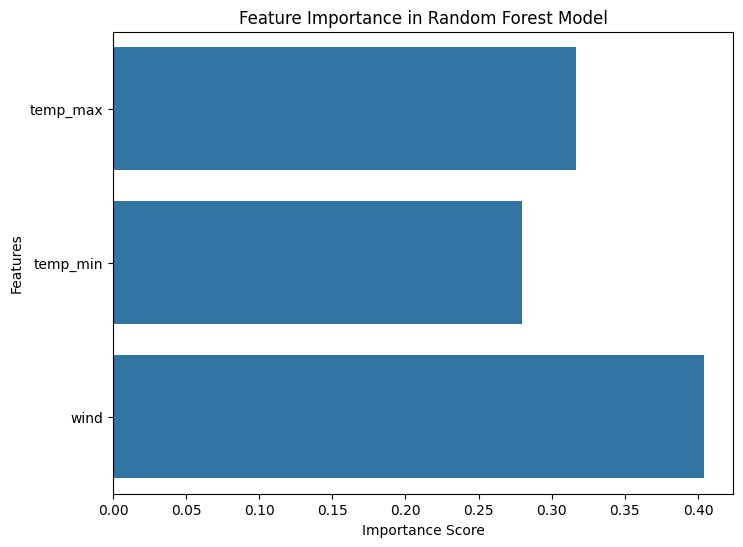

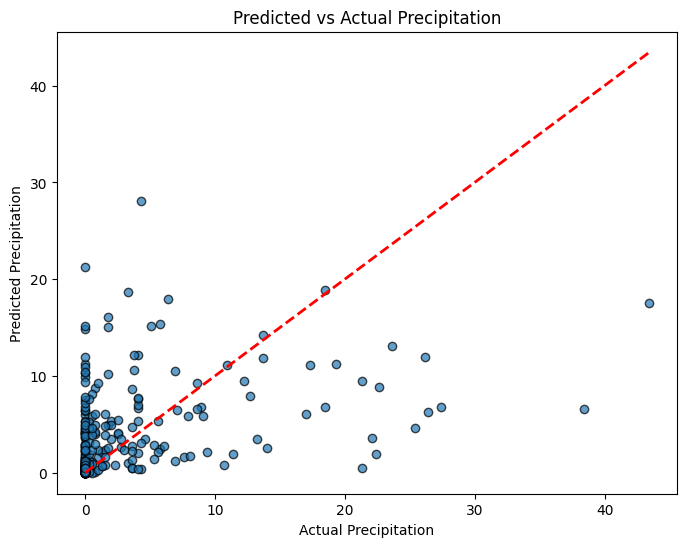

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('seattle-weather.csv')

# Inspect the dataset
print("Dataset Overview:")
print(data.head())
print("\nDataset Information:")
print(data.info())

# Define features and target variable
features = ['temp_max', 'temp_min', 'wind']  # Predictors
target = 'precipitation'  # Target variable

# Check if features and target exist in the dataset
missing_columns = [col for col in features + [target] if col not in data.columns]
if missing_columns:
    raise ValueError(f"The following columns are missing in the dataset: {missing_columns}")

# Split the data into predictors (X) and target (y)
X = data[features]
y = data[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Feature Importance
feature_importances = rf_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Visualize Predicted vs Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Predicted vs Actual Precipitation")
plt.xlabel("Actual Precipitation")
plt.ylabel("Predicted Precipitation")
plt.show()


Model Summary:
                            OLS Regression Results                            
Dep. Variable:          precipitation   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     90.04
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           2.13e-52
Time:                        18:36:22   Log-Likelihood:                -3771.7
No. Observations:                1168   AIC:                             7551.
Df Residuals:                    1164   BIC:                             7572.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8017      0.676     

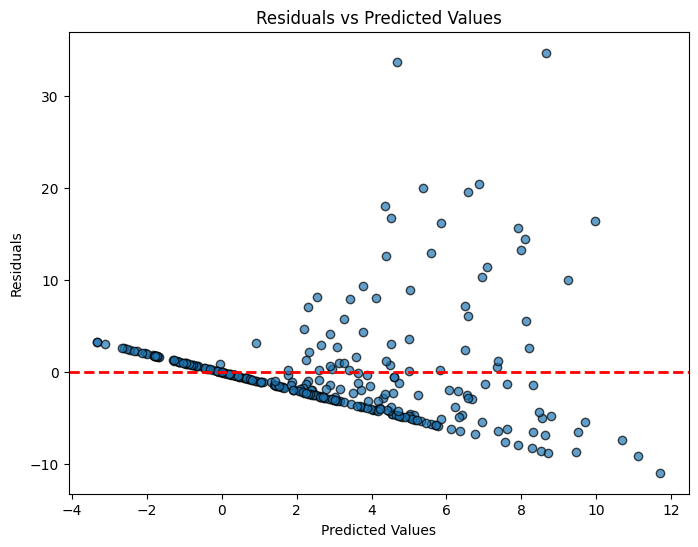

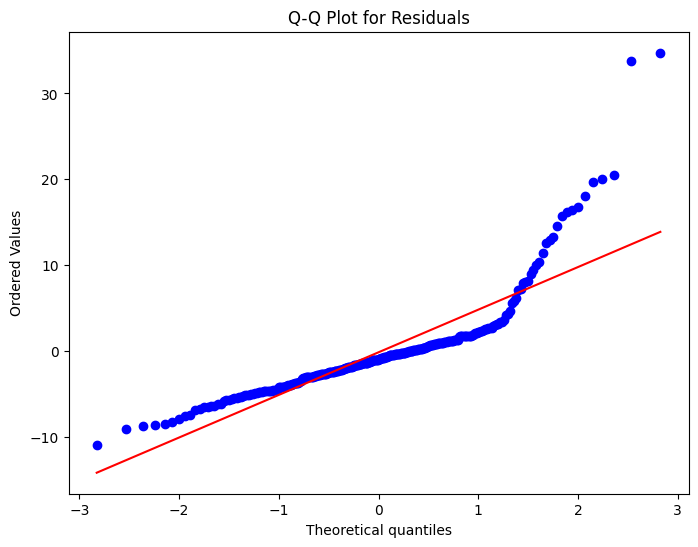


Shapiro-Wilk Test for Normality: p-value = 0.0000


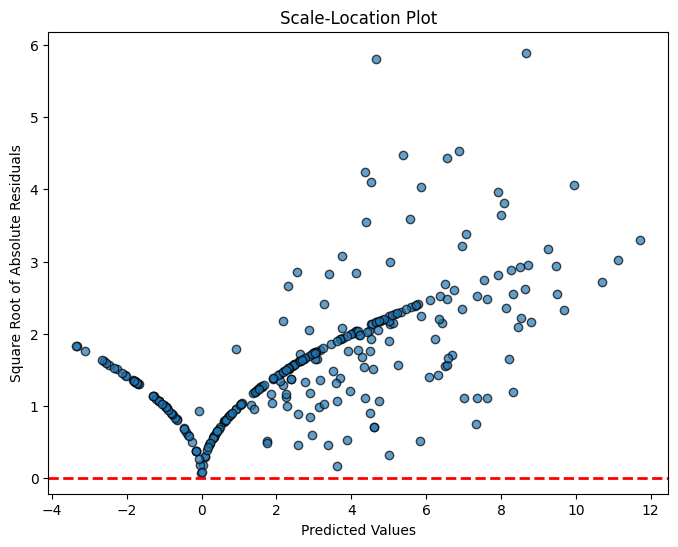

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, probplot

# Load the dataset
data = pd.read_csv('seattle-weather.csv')

# Define features and target variable
features = ['temp_max', 'temp_min', 'wind']
target = 'precipitation'

# Prepare data for regression
X = data[features]
y = data[target]

# Add a constant to the predictors (for intercept in the model)
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression model
print("Model Summary:")
print(model.summary())

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Analyze residuals
residuals = y_test - y_pred

# 1. Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolors='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# 2. Normality of Residuals (Q-Q Plot and Shapiro-Wilk Test)
plt.figure(figsize=(8, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Residuals")
plt.show()

shapiro_test = shapiro(residuals)
print(f"\nShapiro-Wilk Test for Normality: p-value = {shapiro_test.pvalue:.4f}")

# 3. Homoscedasticity (Scale-Location Plot)
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, np.sqrt(np.abs(residuals)), alpha=0.7, edgecolors='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Scale-Location Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Square Root of Absolute Residuals")
plt.show()



Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       144
           1       0.68      0.70      0.69       148

    accuracy                           0.68       292
   macro avg       0.68      0.68      0.68       292
weighted avg       0.68      0.68      0.68       292

ROC-AUC: 0.73


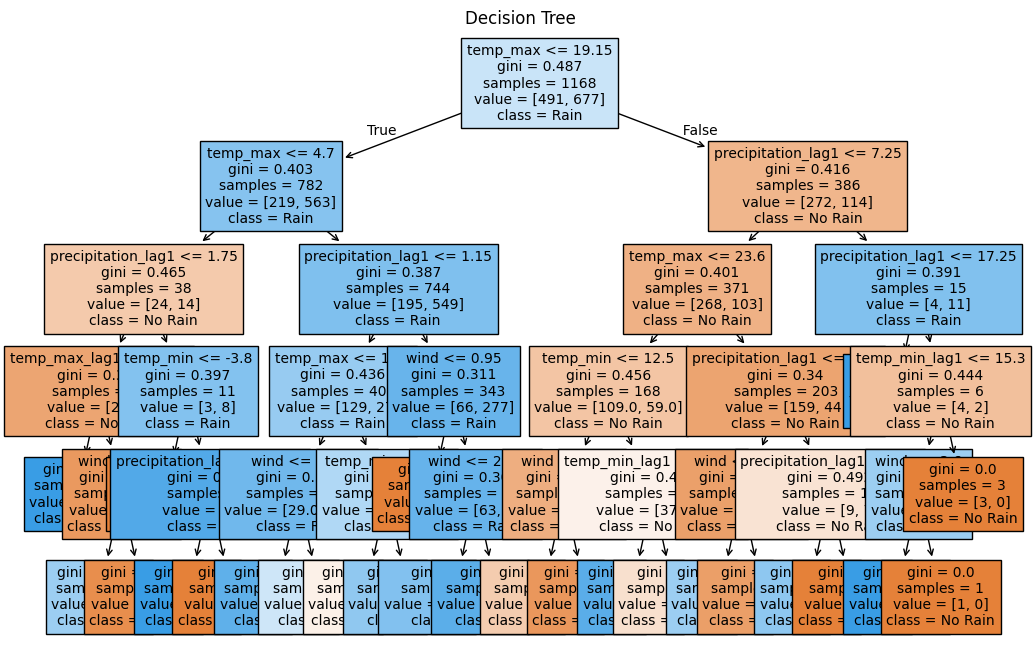


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       144
           1       0.70      0.69      0.69       148

    accuracy                           0.69       292
   macro avg       0.69      0.69      0.69       292
weighted avg       0.69      0.69      0.69       292

ROC-AUC: 0.74


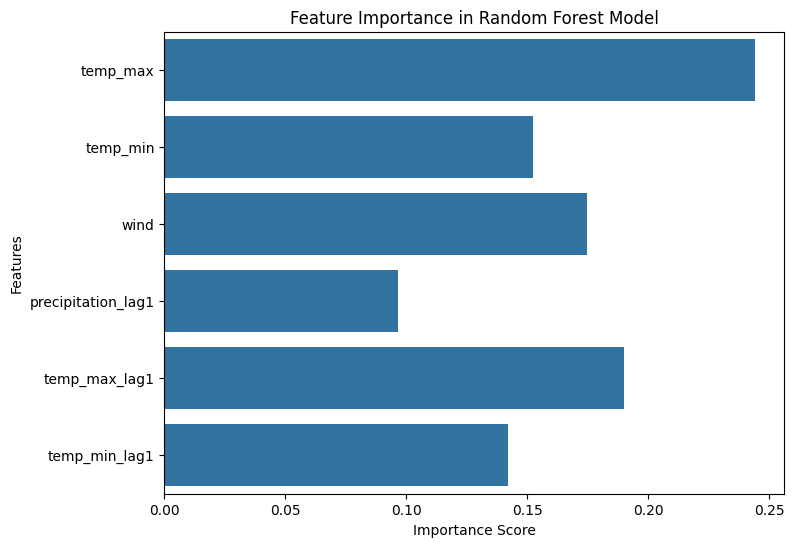

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('seattle-weather.csv')

# Feature engineering: Create binary target variable 'WillRain'
data['WillRain'] = (data['precipitation'].shift(-1) > 0) | (data['precipitation'].shift(-2) > 0)
data['WillRain'] = data['WillRain'].astype(int)  # Convert boolean to integer

# Create lag features
data['precipitation_lag1'] = data['precipitation'].shift(1)
data['temp_max_lag1'] = data['temp_max'].shift(1)
data['temp_min_lag1'] = data['temp_min'].shift(1)

# Drop rows with NaN values (due to lag features)
data = data.dropna()

# Define predictors and target
features = ['temp_max', 'temp_min', 'wind', 'precipitation_lag1', 'temp_max_lag1', 'temp_min_lag1']
target = 'WillRain'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 1. Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and evaluation for Decision Tree
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
print("\nDecision Tree Performance:")
print(classification_report(y_test, y_pred_dt))
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_dt):.2f}")

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=features, class_names=['No Rain', 'Rain'], filled=True, fontsize=10)
plt.title("Decision Tree")
plt.show()

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation for Random Forest
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_rf):.2f}")

# Feature Importance for Random Forest
feature_importances = rf_model.feature_importances_

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


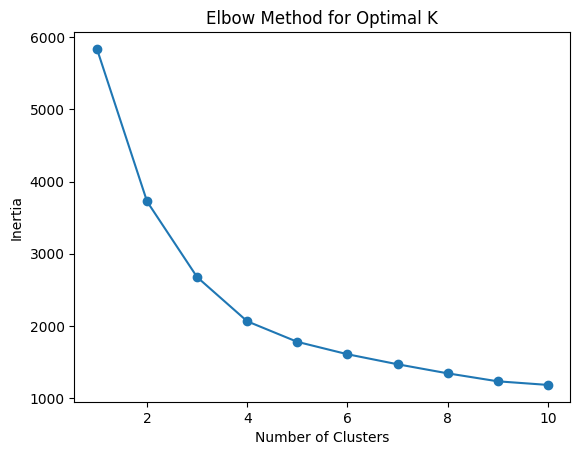

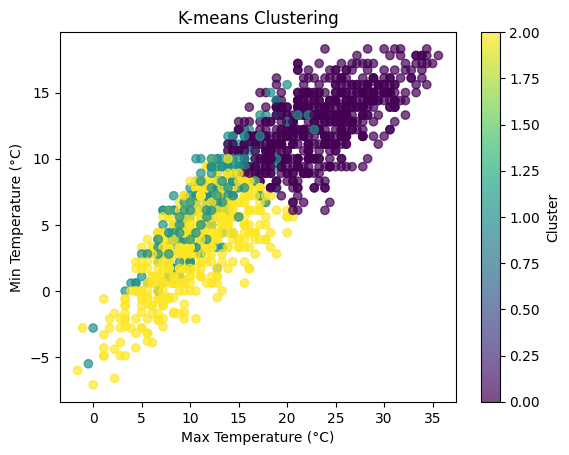

Clustering complete. Results saved to 'seattle-weather-with-clusters.csv'.


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select numerical features for clustering
features = data[['precipitation', 'temp_max', 'temp_min', 'wind']].dropna()

# Normalize the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Determine the optimal number of clusters (elbow method)
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Fit K-means with an optimal number of clusters (e.g., k=3 based on elbow method)
optimal_k = 3  # Adjust based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(normalized_features)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Visualize clusters using two numerical features (e.g., temp_max vs. temp_min)
plt.scatter(data['temp_max'], data['temp_min'], c=data['Cluster'], cmap='viridis', alpha=0.7)
plt.title('K-means Clustering')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Min Temperature (°C)')
plt.colorbar(label='Cluster')
plt.show()

# Save the dataset with cluster labels
data.to_csv('seattle-weather-with-clusters.csv', index=False)
print("Clustering complete. Results saved to 'seattle-weather-with-clusters.csv'.")

In [ ]:
# Compute average values for the features
avg_features = data[['temp_max', 'temp_min', 'wind', 'precipitation']].mean()

# Create a new row with these averages
input_data = pd.DataFrame({
    'temp_max': [avg_features['temp_max']],
    'temp_min': [avg_features['temp_min']],
    'wind': [avg_features['wind']],
    'precipitation_lag1': [avg_features['precipitation']],
    'temp_max_lag1': [avg_features['temp_max']],
    'temp_min_lag1': [avg_features['temp_min']]
})

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Feature engineering
data['precipitation_lag1'] = data['precipitation'].shift(1)
data['temp_max_lag1'] = data['temp_max'].shift(1)
data['temp_min_lag1'] = data['temp_min'].shift(1)
data['WillRain'] = (data['precipitation'].shift(-1) > 0).astype(int)
data = data.dropna()

# Train a new Random Forest model
features = ['temp_max', 'temp_min', 'wind', 'precipitation_lag1', 'temp_max_lag1', 'temp_min_lag1']
target = 'WillRain'

X = data[features]
y = data[target]

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Define hypothetical feature values (averages)
avg_features = data[features].mean()

# Create input data for two dates with average values
input_data = pd.DataFrame([avg_features, avg_features])

# Predict for both dates
predictions = rf_model.predict(input_data)

# Display the result
for date, prediction in zip(['2016-01-01', '2016-01-02'], predictions):
    print(f"Date: {date}, Prediction: {'Rain' if prediction == 1 else 'No Rain'}")


Date: 2016-01-01, Prediction: No Rain
Date: 2016-01-02, Prediction: No Rain
